In [28]:
# import packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA # Dimensionality Reduction

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import pickle
import time # for computation time assessment

In [29]:
pickle_in = open("pickle/X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("pickle/y.pickle", "rb")
y = pickle.load(pickle_in)


In [30]:
print('# of Samples:', len(y))
print('# of IncorrectlyWornMask A Mask:', (y == 0).sum())
print('# of  With A Mask:', (y == 1).sum())
print('# of Without Mask:', (y == 2).sum())

# of Samples: 2079
# of IncorrectlyWornMask A Mask: 703
# of  With A Mask: 690
# of Without Mask: 686


In [31]:
y.shape
X.shape

(2079, 3072)

In [32]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))


Length of our Training data:  1663 
Length of our Testing data:  416


In [33]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Use training data to fit KNN model
knn.fit(X_train, y_train)
pickle.dump(knn,open("models/knn.pkl","wb"))

In [34]:
# make prediction on entire test data
predictions_set = knn.predict(X_test)
predictions_set

array([0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0,

In [35]:
# 75-82% accuracy depending on the divide
print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set))

# #mô hình knn sử dụng thư viện sklearn
acc = accuracy_score(y_test, predictions_set)
precision = precision_score(y_test, predictions_set, average='macro')
recall = recall_score(y_test, predictions_set, average='macro')
f1 = f1_score(y_test, predictions_set, average='macro')
pickle.dump([acc,precision,recall,f1],open("models/knn_quality.pkl","wb"))


KNN Accuracy: 0.825


SVM classifier


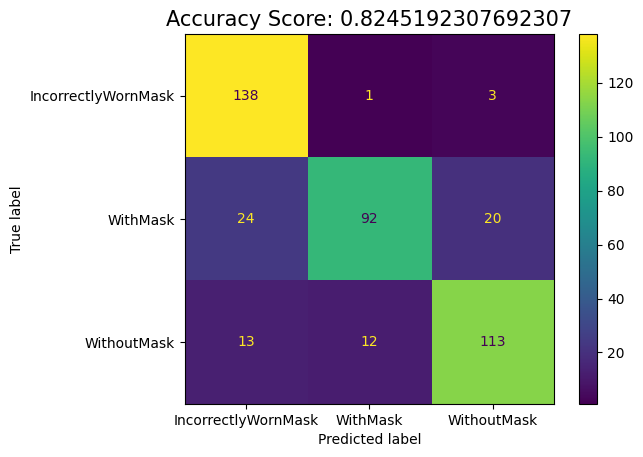

In [36]:
# Calculate Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay


# plot_confusion_matrix
class_names = ['IncorrectlyWornMask', 'WithMask','WithoutMask']
print("SVM classifier")
cnf_matrix = confusion_matrix(y_test, predictions_set)
disp = ConfusionMatrixDisplay(cnf_matrix,display_labels = class_names)
disp.plot()
plt.savefig("imagemodels/knn_confusion.png",dpi=120)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(all_sample_title,size=15)
plt.show()

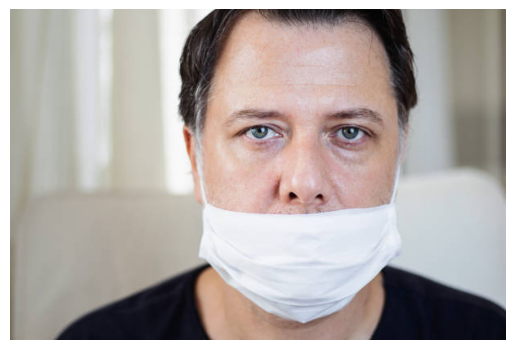

[0]
dự đoán: IncorrectlyWornMask


In [37]:
# Test predict
from keras.preprocessing import image

imgshow = image.load_img("imgthucte/istockphoto-1250449628-612x612.jpeg")
plt.imshow(imgshow)
plt.axis('off')
plt.show()
imgpre = image.load_img("imgthucte/istockphoto-1250449628-612x612.jpeg", target_size=(32,32))
imgpre_array = image.img_to_array(imgpre)
imgpre_array = np.array(imgpre_array, dtype='float32')/255.0
imgpre_array = imgpre_array.reshape(-1,)
imgpre_array.shape
pre2 = knn.predict([imgpre_array])

switcher = { 0 : 'IncorrectlyWornMask',1 :'WithMask', 2 :'WithoutMask'}

print(pre2)
print("dự đoán:",switcher.get(pre2[0], "nothing"))